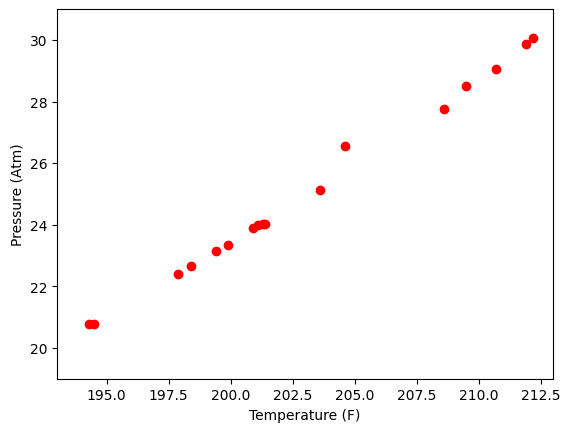

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7,
               211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04,
               29.88, 30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


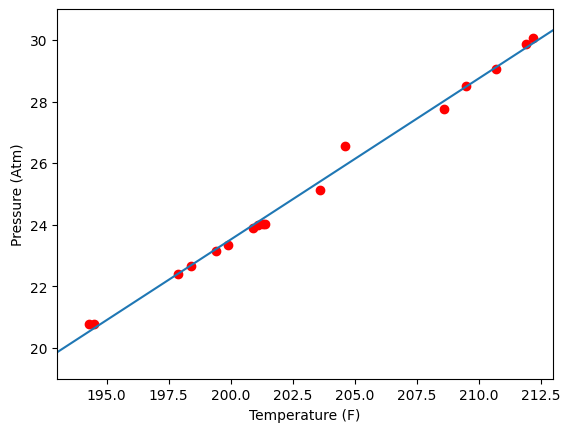

In [2]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1 * x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')  # data
plt.plot(x0, y0)  # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [3]:
import math
import numpy as np

with open('ex2Data/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [4]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

    # compute ro=-sign(x0)||x||
    ro = -np.sign(x[0]) * np.linalg.norm(x)

    # compute the householder vector v
    e = np.zeros(k)
    e[0] = 1
    v = (1 / (x[0] - ro)) * (x - (ro * e))

    # apply v to each column of A to find R
    for i in range(N):
        R[n:, i] = R[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ R[n:, i])

    # apply v to each column of Q
    for i in range(M):
        Q[n:, i] = Q[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R


def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars)  # QR decomposition
    R_pinv = np.linalg.pinv(R)  # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T)  # apply formula

    return np.dot(A, y_data)


w = linear_regression(x_data, y_data)  # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730907
                 Tax: -4.227983208329621
                Dlic: 0.47187121344198524
              Income: -0.006135330970417774
            LogMiles: 18.54527450604799


In [21]:
from sklearn import datasets, linear_model
import math
import numpy as np
import pandas as pd

with open('ex2Data/fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])
x_data = pd.DataFrame(x_data)
Xbar = np.concatenate(np.ones(x_data.shape[0], 1), axis=1)
y_data = pd.DataFrame(y_data)
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y_data)
print(regr.coef_)
y_pred = regr.predict(Xbar)
scores = np.dot((y_data - y_pred).T, (y_data - y_pred))
#sử dụng nghịch đảo suy rộng để tính toán bài trên

TypeError: Cannot interpret '1' as a data type

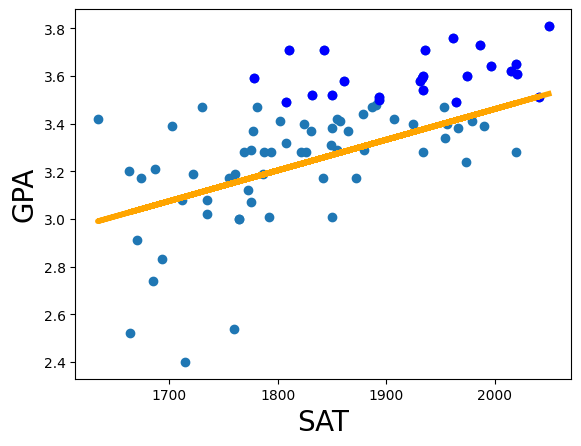

In [70]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Change to data path on your computer
data = pd.read_csv("ex2Data/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = np.array(data['GPA']).reshape(-1, 1)
x = np.array(data['SAT']).reshape(-1, 1)

regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=60, shuffle=False)
model = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
yhat = regr.intercept_ + x * regr.coef_
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x, y)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [88]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('ex2Data/vidu4_lin_reg.txt', sep=" ", header=0)
print(data)
regr = linear_model.LinearRegression()
y_data = data.iloc[:, -1]
x_data = data.iloc[:, 1:6]

     ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0     1    56   21  160     14.0         6.00      1.95
1     2    76   18  150     12.0         4.97      1.33
2     3    63   16  160      4.4         6.39      0.83
3     4    78   20  100      4.0         7.00      2.00
4     5    87   20  110      4.6         4.10      1.30
..  ...   ...  ...  ...      ...          ...       ...
95   96    55   24  160      5.0         7.20      0.90
96   97    76   15  140      3.1         5.24      1.16
97   98    70   25  180      4.0         4.40      1.00
98   99    85   21  160      5.2         5.20      0.97
99  100    87   22  130      9.0         5.20      2.30

[100 rows x 7 columns]


In [93]:
print(x_data)
print(y_data)

    TUOI  BMI   HA  GLUCOSE  CHOLESTEROL
0     56   21  160     14.0         6.00
1     76   18  150     12.0         4.97
2     63   16  160      4.4         6.39
3     78   20  100      4.0         7.00
4     87   20  110      4.6         4.10
..   ...  ...  ...      ...          ...
95    55   24  160      5.0         7.20
96    76   15  140      3.1         5.24
97    70   25  180      4.0         4.40
98    85   21  160      5.2         5.20
99    87   22  130      9.0         5.20

[100 rows x 5 columns]
0     1.95
1     1.33
2     0.83
3     2.00
4     1.30
      ... 
95    0.90
96    1.16
97    1.00
98    0.97
99    2.30
Name: BEDAYNTM, Length: 100, dtype: float64


In [107]:
regr.fit(x_data, y_data)
res = list(zip(x_data.columns.tolist(), regr.coef_))
for o in res:
    print("{: >20}: {: >10}".format(*o))

                TUOI: 0.009946940947109854
                 BMI: -0.00020654770133401133
                  HA: 0.0021813669452475076
             GLUCOSE: 0.007670101694230014
         CHOLESTEROL: 0.03847024823970344


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, shuffle=False)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

0.30532598337436595
0.22740099167615907


In [86]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

data = pd.read_csv("ex2Data/real_estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [87]:
#tách dữ liệu
y_data = data.iloc[:, -1]
x_data = data.iloc[:, 1:7]
#lấy phần nguyên của năm giao dịch
x_data['X1 transaction date'] = data['X1 transaction date'].apply(int)
lregr = linear_model.LinearRegression()
#chia dữ liệu thành bộ training và validation
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=350, shuffle=False)
lregr.fit(x_train, y_train)
#dự đoán
y_pred = lregr.predict(x_test)
sse = ((y_test - y_pred) ** 2).sum()
print('Tổng bình phương sai số của dự đoán:', sse)

Tổng bình phương sai số của dự đoán: 4083.6448394273953
63.80695061605305
